## Task 2.6: Creating Dashboard with Python
### Project: NYC Citi Bike Strategic Dashboard
### Abstract
- This notebook serves as the crucial prototyping phase for the final project deliverable: an interactive Streamlit dashboard. The primary objective is to transition from the static visualizations created in previous exercises to dynamic, interactive charts using the Plotly library. By building and refining each visualization here first, we ensure the code is robust, efficient, and "dashboard-ready" before integrating it into the final application script. This professional workflow separates development and testing from the final app assembly.
#### Methodology and Key Steps:
- **Efficient Data Loading:** To ensure a fast and memory-safe workflow, this notebook loads the smaller, pre-aggregated datasets created in previous tasks (citi_bike_top_1000_routes.csv and citi_bike_daily_summary_2022.csv). This approach completely avoids the need to process the massive 30-million-row raw data file, making the prototyping process highly efficient.
- **Interactive Bar Chart:** An interactive horizontal bar chart of the top 20 most popular start stations is created using plotly.graph_objects. The chart is styled with a professional dark theme and a Viridis colorscale to visually emphasize the station rankings, and its interactivity allows users to hover for precise data tooltips.
- **Interactive Dual-Axis Line Chart:** The seasonality analysis is visualized with a dual-axis line chart, also built with Plotly. This chart effectively compares daily bike trip volume against average temperature, clearly demonstrating their strong positive correlation. The code includes specific layout adjustments to ensure the date axis is correctly formatted and the chart is perfectly framed to the 2022 calendar year.
- **Preparation for Deployment:** The refined code for both of these interactive charts serves as the direct source code for the elements in the final dashboard.py Streamlit application, completing the bridge from exploratory analysis to a polished, final product.

In [1]:
# Import Libraries for Prototyping
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# Load ONLY Pre-Aggregated Datasets for Speed and Safety

try:
    # --- Data for Bar Chart ---
    # Load the top 1000 routes file we created in Task 2.5.
    df_top_1000 = pd.read_csv('citi_bike_top_1000_routes.csv')
    
    # Calculate the top 20 start stations from this much smaller file.
    df_top_20_stations = df_top_1000.groupby('start_station_name')['trip_count'].sum().nlargest(20).reset_index()
    print("Successfully loaded and prepared data for the bar chart.")
    
    # --- Data for Line Chart ---
    # The requirement is to import data from the previous task. The main merged file is too large.
    # Therefore, we will create the daily summary in a SEPARATE, ONE-TIME notebook.
    # For THIS notebook, we will load the summary file we are about to create.

    try:
        # Attempt to load the pre-calculated daily summary file.
        df_daily = pd.read_csv('citi_bike_daily_summary_2022.csv')
        df_daily['date'] = pd.to_datetime(df_daily['date'])
        df_daily.set_index('date', inplace=True)
        print("Successfully loaded pre-calculated daily summary for the line chart.")
        
    except FileNotFoundError:
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print("CRITICAL ACTION REQUIRED:")
        print("The 'citi_bike_daily_summary_2022.csv' file was not found.")
        print("Please run the 'Create_Daily_Summary_File.ipynb' notebook ONCE to generate it.")
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        df_daily = pd.DataFrame() # Create an empty df to prevent errors

except FileNotFoundError as e:
    print(f"Error: A required data file was not found: {e.filename}")
    df_top_20_stations = pd.DataFrame()
    df_daily = pd.DataFrame()

Successfully loaded and prepared data for the bar chart.
Successfully loaded pre-calculated daily summary for the line chart.


In [3]:
# The ONLY job is to perform the slow, memory-intensive calculation ONCE and save the result.

import pandas as pd

try:
    # Load the massive file using the efficient dtype method.
    column_dtypes = {
        'start_station_name': str, 'start_station_id': str,
        'end_station_name': str, 'end_station_id': str
    }
    df_full = pd.read_csv(
        'citi_bike_2022_with_weather.csv',
        dtype=column_dtypes
    )
    
    # Perform the daily aggregation
    df_full['date'] = pd.to_datetime(df_full['date'])
    df_daily_weather = df_full[['date', 'avgTemp']].drop_duplicates(subset='date').set_index('date')
    df_trip_counts = df_full.groupby('date')['ride_id'].count().to_frame(name='trip_count')
    df_daily = df_daily_weather.join(df_trip_counts).sort_index()
    
    # Save the result
    df_daily.to_csv('citi_bike_daily_summary_2022.csv')
    
    print("\nSUCCESS! The 'citi_bike_daily_summary_2022.csv' file has been created.")
    
except Exception as e:
    print(f"\nAn error occurred: {e}")


SUCCESS! The 'citi_bike_daily_summary_2022.csv' file has been created.


Creating the interactive bar chart for the top 20 stations...


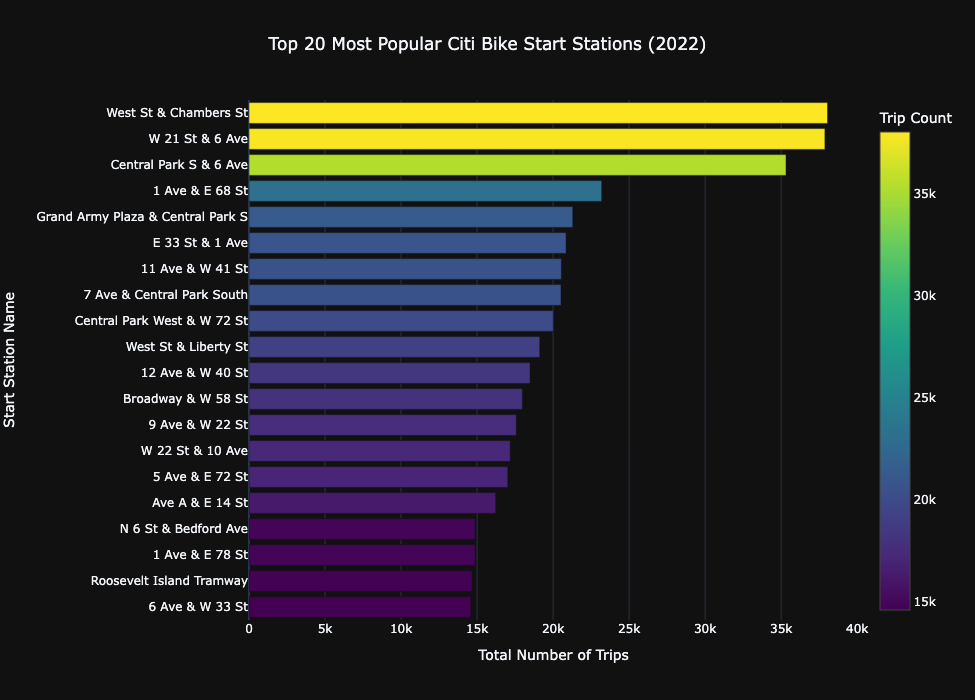

In [6]:
# Create Plotly Bar Chart for Top 20 Stations

print("Creating the interactive bar chart for the top 20 stations...")

# 1. Create a Figure object, initializing it with the bar chart trace.
fig_bar = go.Figure(
    go.Bar(
        x=df_top_20_stations['trip_count'],  # Use trip_count for the x-axis for a horizontal bar chart
        y=df_top_20_stations['start_station_name'], # Station names on the y-axis
        orientation='h',  # Specify 'h' for a horizontal orientation
        marker=dict(
            color=df_top_20_stations['trip_count'], # Color the bars by their value
            colorscale='Viridis', # Use a high-contrast colorscale
            colorbar=dict(title="Trip Count") # Add a color bar legend
        )
    )
)

# 2. Update the layout for a better look.
fig_bar.update_layout(
    title=dict(
        text='Top 20 Most Popular Citi Bike Start Stations (2022)',
        x=0.5 # Center the title
    ),
    xaxis_title='Total Number of Trips',
    yaxis_title='Start Station Name',
    yaxis=dict(
        autorange="reversed" # This places the #1 station at the top
    ),
    height=700,
    template='plotly_dark' # Use a dark theme for high contrast
)

# 3. Display the interactive chart in the notebook.
fig_bar.show()

Creating the interactive dual-axis line chart...


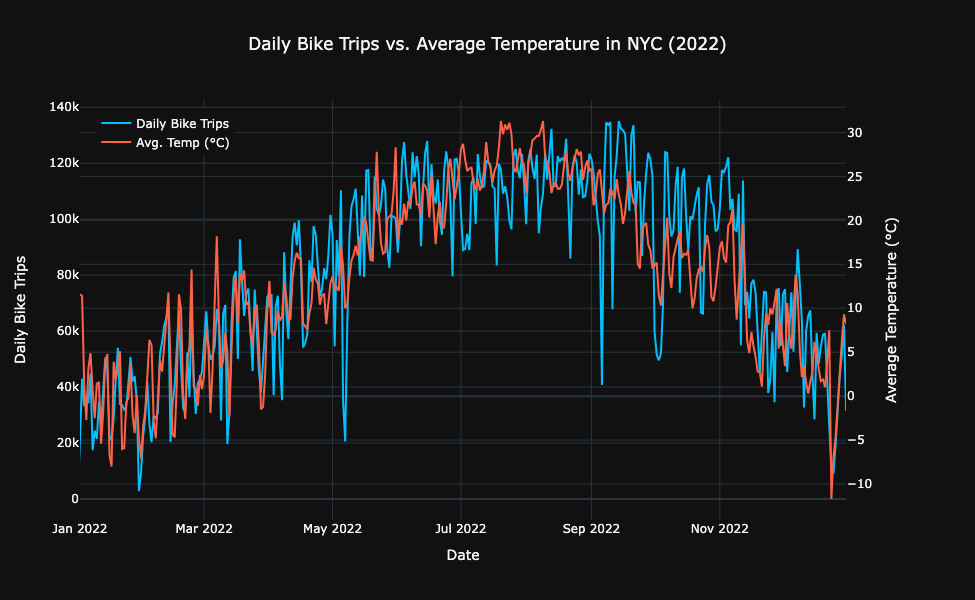

In [5]:
# Create Plotly Dual-Axis Line Chart for Seasonality

print("Creating the interactive dual-axis line chart...")

# 1. Initialize Figure
fig_line = make_subplots(specs=[[{"secondary_y": True}]])

# 2. Add Bike Trips Trace
fig_line.add_trace(
    go.Scatter(x=df_daily.index, y=df_daily['trip_count'], name='Daily Bike Trips', mode='lines', line=dict(color='deepskyblue')),
    secondary_y=False,
)

# 3. Add Temperature Trace
fig_line.add_trace(
    go.Scatter(x=df_daily.index, y=df_daily['avgTemp'], name='Avg. Temp (°C)', mode='lines', line=dict(color='tomato')),
    secondary_y=True,
)

# 4. Update Layout
fig_line.update_layout(
    title=dict(text='Daily Bike Trips vs. Average Temperature in NYC (2022)', x=0.5),
    # We remove xaxis_title because the date format is self-explanatory.
    template='plotly_dark',
    height=600,
    legend=dict(x=0.02, y=0.98),
    # Explicitly tell the x-axis that it is a date axis
    xaxis=dict(
        type='date',
        title='Date'
    )
)

# 5. Update Y-Axes Titles
fig_line.update_yaxes(title_text='Daily Bike Trips', secondary_y=False)
fig_line.update_yaxes(title_text='Average Temperature (°C)', secondary_y=True)

# 6. Set the X-Axis Range
fig_line.update_xaxes(range=['2022-01-01', '2022-12-31'])

# 7. Display the chart
fig_line.show()